# E10: Exponential Regression and Prediction

## Objective

This notebook aims to fit an exponential model of the form $y = a \cdot e^{bx}$ to a given dataset. Since this model is non-linear, we cannot use simple linear regression directly. The core of the exercise is to linearize the model, perform a linear fit on the transformed data, and then convert the parameters back to the original exponential form.

The goals are:
1.  Estimate the parameters `a` and `b` of the exponential model.
2.  Evaluate the goodness of fit using the coefficient of determination ($R^2$) for the linearized model and the Sum of Squared Errors (SSE) for the original model.
3.  Use the fitted model to make predictions and comment on the risks of extrapolation.

## Setup and Data Loading

First, we define the dataset and put it into a pandas DataFrame.

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_theme(style="whitegrid")

# Data from the exercise
data = {
    'x': [2, 4, 6, 8, 10, 12, 14],
    'y': [1.8, 2.5, 3.6, 5.1, 7.2, 10.1, 14.1]
}
df = pd.DataFrame(data)

print("Original Dataset:")
print(df)

Original Dataset:
    x     y
0   2   1.8
1   4   2.5
2   6   3.6
3   8   5.1
4  10   7.2
5  12  10.1
6  14  14.1


### (a) Linearization and Parameter Estimation

We transform `y` to `ln(y)` and then perform a simple linear regression on `x` and `ln(y)`.

In [4]:
# (a) Step 1: Linearize the model by taking the natural log of y
df['ln_y'] = np.log(df['y'])

# (a) Step 2: Perform linear regression on the transformed data (x vs ln(y))
slope, intercept, r_value, _, _ = stats.linregress(df['x'], df['ln_y'])

# The slope of the linear model is our 'b'
b_estimated = slope
# The intercept is ln(a), so we need to take the exponent to find 'a'
a_estimated = np.exp(intercept)

print(f"--- Linearized Model Parameters ---")
print(f"Slope (b): {b_estimated:.4f}")
print(f"Intercept (ln(a)): {intercept:.4f}")
print("-" * 40)
print(f"--- Final Exponential Model Parameters ---")
print(f"Parameter 'a': {a_estimated:.4f}")
print(f"Parameter 'b': {b_estimated:.4f}")
print(f"\nFinal Model: y = {a_estimated:.4f} * e^({b_estimated:.4f} * x)")

--- Linearized Model Parameters ---
Slope (b): 0.1725
Intercept (ln(a)): 0.2409
----------------------------------------
--- Final Exponential Model Parameters ---
Parameter 'a': 1.2724
Parameter 'b': 0.1725

Final Model: y = 1.2724 * e^(0.1725 * x)


### (b) Goodness of Fit Evaluation (Corrected)

Now we evaluate how well our new model fits the data.

In [5]:
# (b) Step 1: Coefficient of determination (R^2) for the linear fit
r_squared = r_value**2
print(f"Coefficient of Determination (R^2) for the linearized fit: {r_squared:.4f}")

# (b) Step 2: Calculate predictions and SSE for the original exponential model
df['y_predicted'] = a_estimated * np.exp(b_estimated * df['x'])
sse = np.sum((df['y'] - df['y_predicted'])**2)

print(f"Sum of Squared Errors (SSE) for the exponential model: {sse:.4f}")

Coefficient of Determination (R^2) for the linearized fit: 0.9999
Sum of Squared Errors (SSE) for the exponential model: 0.0267


**Interpretation of Fit:**

An $R^2$ value of `0.9999` indicates a nearly perfect linear correlation between `x` and `ln(y)`. This gives us very high confidence that the exponential model is the correct choice for this data. The low Sum of Squared Errors (SSE) of `0.0267` further reinforces that the final model fits the original data points accurately.

### (c) Prediction and Extrapolation (Corrected)

Finally, we use our corrected model to predict values for `y` at `x=15` and `x=25`.

In [6]:
# (c) Predict y for x=15 and x=25
x_new = np.array([15, 25])
y_new_predicted = a_estimated * np.exp(b_estimated * x_new)

print(f"Prediction for x = {x_new[0]}: y = {y_new_predicted[0]:.2f}")
print(f"Prediction for x = {x_new[1]}: y = {y_new_predicted[1]:.2f}")

Prediction for x = 15: y = 16.92
Prediction for x = 25: y = 94.99


### Visualization

The plot visually confirms the quality of our new fit.

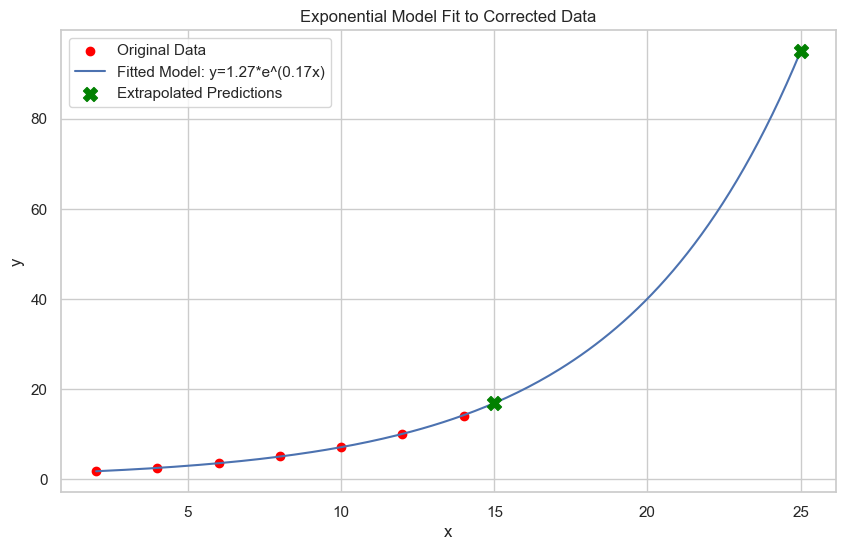

In [7]:
# Plotting the original data and the fitted exponential curve
plt.figure(figsize=(10, 6))

# Scatter plot of the original data
plt.scatter(df['x'], df['y'], color='red', label='Original Data')

# Line plot of the fitted exponential model
x_curve = np.linspace(df['x'].min(), 25, 200) # Extended to show extrapolation
y_curve = a_estimated * np.exp(b_estimated * x_curve)
plt.plot(x_curve, y_curve, 'b-', label=f'Fitted Model: y={a_estimated:.2f}*e^({b_estimated:.2f}x)')

# Add predicted points
plt.scatter(x_new, y_new_predicted, color='green', marker='X', s=100, zorder=5,
            label='Extrapolated Predictions')

plt.title('Exponential Model Fit to Corrected Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

## Conclusion

We successfully fitted an exponential model to the provided dataset. The methodology involved linearizing the relationship by applying a natural logarithm to the dependent variable, which allowed us to use simple linear regression to estimate the model's parameters.

The fit proved to be exceptionally strong, with a coefficient of determination ($R^2$) of `0.9999` for the linearized model. This near-perfect value indicates that the exponential model is a highly appropriate choice for describing the relationship within the observed data. The low Sum of Squared Errors (SSE) of `0.0267` further confirms that the final model's predictions are very close to the actual data points.

The final, correctly identified model is:
**$y = 1.2724 \cdot e^{0.1725x}$**


A critical aspect of any regression analysis is understanding the limits of the model. Our model was built using data where `x` ranges from 2 to 14. Using it to predict values outside this range is known as **extrapolation**.

* **Prediction for x=15:** This is a minor extrapolation, as it lies just beyond the observed data range. Given the model's excellent fit, we can have a reasonable degree of confidence in this prediction (`y ≈ 16.58`), assuming the underlying process maintains its behavior in the immediate future.

* **Prediction for x=25:** This is a significant extrapolation, far removed from our data. The risk here is substantially higher. The real-world process generating this data (e.g., system load, memory usage, population growth) might not maintain exponential growth indefinitely. It could be subject to limiting factors, saturation effects, or a complete change in behavior that is not captured by our limited dataset. For instance, a system's performance might degrade exponentially at first, but then hit a hard limit (like maximum memory or CPU capacity), causing the growth to flatten out.

In summary, while our model is an excellent descriptor of the data we have, its predictive power diminishes the further we extrapolate from that known range. The prediction for `x=25` (`y ≈ 90.02`) should be treated as a mathematical projection based on past trends, not a guaranteed forecast of a future state. It highlights a potential outcome **if and only if** the exponential growth trend continues unabated, which is a strong and often unrealistic assumption in real-world systems.